In [ ]:
%load_ext autoreload
%autoreload 2

Install necessary software needed for EDA and performing descriptive statistics.

In [34]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

Need to import the database that we will be querying from

In [35]:
from src.data import data_collection

In [36]:
import psycopg2
import pandas as pd

In [37]:
DBNAME = "opportunity_youth"

In [38]:
conn = psycopg2.connect(dbname=DBNAME)


Load the dataset with all columns in order to filter out unnecessary information

In [39]:
pums_2017 = pd.read_sql("SELECT * FROM pums_2017 LIMIT 10;", conn)
print(pd.read_sql("SELECT count(*) FROM pums_2017;", conn), list(pums_2017.columns), sep='\n\n')
pums_2017.head()

    count
0  359075

['rt', 'serialno', 'division', 'sporder', 'puma', 'region', 'st', 'adjinc', 'pwgtp', 'agep', 'cit', 'citwp', 'cow', 'ddrs', 'dear', 'deye', 'dout', 'dphy', 'drat', 'dratx', 'drem', 'eng', 'fer', 'gcl', 'gcm', 'gcr', 'hins1', 'hins2', 'hins3', 'hins4', 'hins5', 'hins6', 'hins7', 'intp', 'jwmnp', 'jwrip', 'jwtr', 'lanx', 'mar', 'marhd', 'marhm', 'marht', 'marhw', 'marhyp', 'mig', 'mil', 'mlpa', 'mlpb', 'mlpcd', 'mlpe', 'mlpfg', 'mlph', 'mlpi', 'mlpj', 'mlpk', 'nwab', 'nwav', 'nwla', 'nwlk', 'nwre', 'oip', 'pap', 'relp', 'retp', 'sch', 'schg', 'schl', 'semp', 'sex', 'ssip', 'ssp', 'wagp', 'wkhp', 'wkl', 'wkw', 'wrk', 'yoep', 'anc', 'anc1p', 'anc2p', 'decade', 'dis', 'drivesp', 'esp', 'esr', 'fod1p', 'fod2p', 'hicov', 'hisp', 'indp', 'jwap', 'jwdp', 'lanp', 'migpuma', 'migsp', 'msp', 'naicsp', 'nativity', 'nop', 'oc', 'occp', 'paoc', 'pernp', 'pincp', 'pobp', 'povpip', 'powpuma', 'powsp', 'privcov', 'pubcov', 'qtrbir', 'rac1p', 'rac2p', 'rac3p', 'racaian', 'racasn', 'r

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000019658,9,01,11507,4,53,1061971,15.0,34.0,...,15.0,4.0,14.0,4.0,24.0,15.0,3.0,4.0,15.0,15.0
1,P,2013000019658,9,02,11507,4,53,1061971,12.0,38.0,...,13.0,4.0,13.0,4.0,19.0,13.0,3.0,4.0,11.0,12.0
2,P,2013000019658,9,03,11507,4,53,1061971,14.0,4.0,...,15.0,4.0,13.0,5.0,27.0,17.0,4.0,5.0,14.0,15.0
3,P,2013000019658,9,04,11507,4,53,1061971,12.0,2.0,...,13.0,4.0,13.0,3.0,20.0,13.0,4.0,4.0,11.0,12.0
4,P,2013000019665,9,01,11601,4,53,1061971,85.0,31.0,...,94.0,27.0,151.0,26.0,81.0,86.0,92.0,89.0,89.0,86.0


We will load all of the tables from the database and assign them to variables. Previewing them to see the columns and if they have any relation to columns in other tables.

In [40]:
wa_jobs_2017 = pd.read_sql("SELECT * FROM wa_jobs_2017 LIMIT 10;", conn)
print(print(pd.read_sql("SELECT COUNT(*) FROM wa_jobs_2017;", conn)),  list(wa_jobs_2017.columns), sep="\n\n")
wa_jobs_2017


   count
0  50890
None

['w_geocode', 'c000', 'ca01', 'ca02', 'ca03', 'ce01', 'ce02', 'ce03', 'cns01', 'cns02', 'cns03', 'cns04', 'cns05', 'cns06', 'cns07', 'cns08', 'cns09', 'cns10', 'cns11', 'cns12', 'cns13', 'cns14', 'cns15', 'cns16', 'cns17', 'cns18', 'cns19', 'cns20', 'cr01', 'cr02', 'cr03', 'cr04', 'cr05', 'cr07', 'ct01', 'ct02', 'cd01', 'cd02', 'cd03', 'cd04', 'cs01', 'cs02', 'cfa01', 'cfa02', 'cfa03', 'cfa04', 'cfa05', 'cfs01', 'cfs02', 'cfs03', 'cfs04', 'cfs05', 'createdate']


,w_geocode,c000,ca01,ca02,ca03,ce01,ce02,ce03,cns01,cns02,...,cfa02,cfa03,cfa04,cfa05,cfs01,cfs02,cfs03,cfs04,cfs05,createdate
0,530019501001010,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
1,530019501001024,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
2,530019501001026,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
3,530019501001044,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
4,530019501001053,2,0,2,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
5,530019501001061,7,1,3,3,0,5,2,7,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
6,530019501001090,2,0,2,0,0,2,0,2,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
7,530019501001099,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
8,530019501001104,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
9,530019501001112,4,1,2,1,0,2,2,4,0,...,0,0,0,0,0,0,0,0,0,2019-08-25


In [81]:
wa_geo_xwalk_stschool_king = pd.read_sql("SELECT DISTINCT * FROM wa_geo_xwalk WHERE stschool IN ('5300300', '5302820', '5303540', '5303960', '5307230', '5307710', '5308130') ;", conn)
print(print(pd.read_sql("SELECT COUNT(*) FROM wa_geo_xwalk WHERE stschool IN ('5300300', '5302820', '5303540', '5303960', '5307230', '5307710', '5308130');", conn)),  list(wa_geo_xwalk.columns), sep="\n\n")

wa_geo_xwalk_stschool_king


   count
0  21156
None

['tabblk2010', 'st', 'stusps', 'stname', 'cty', 'ctyname', 'trct', 'trctname', 'bgrp', 'bgrpname', 'cbsa', 'cbsaname', 'zcta', 'zctaname', 'stplc', 'stplcname', 'ctycsub', 'ctycsubname', 'stcd116', 'stcd116name', 'stsldl', 'stsldlname', 'stsldu', 'stslduname', 'stschool', 'stschoolname', 'stsecon', 'dtseconname', 'trib', 'tribname', 'tsub', 'tsubname', 'stanrc', 'stanrcname', 'necta', 'nectname', 'mil', 'milname', 'stwib', 'stwibname', 'blklatdd', 'blklondd', 'createdate']


,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,...,stanrcname,necta,nectname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
0,530330001001000,53,WA,Washington ...,53033,"King County, WA ...",53033000100,"1 (King, WA) ...",530330001001,"1 (Tract 1, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.726394,-122.276856,2019-08-26
1,530330001001001,53,WA,Washington ...,53033,"King County, WA ...",53033000100,"1 (King, WA) ...",530330001001,"1 (Tract 1, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.719287,-122.278502,2019-08-26
2,530330001001002,53,WA,Washington ...,53033,"King County, WA ...",53033000100,"1 (King, WA) ...",530330001001,"1 (Tract 1, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.722034,-122.280278,2019-08-26
3,530330001001003,53,WA,Washington ...,53033,"King County, WA ...",53033000100,"1 (King, WA) ...",530330001001,"1 (Tract 1, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.731235,-122.281421,2019-08-26
4,530330001001004,53,WA,Washington ...,53033,"King County, WA ...",53033000100,"1 (King, WA) ...",530330001001,"1 (Tract 1, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.727336,-122.280734,2019-08-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21151,530530703162015,53,WA,Washington ...,53053,"Pierce County, WA ...",53053070316,"703.16 (Pierce, WA) ...",530530703162,"2 (Tract 703.16, Pierce, WA) ...",...,None,99999,None,None,None,53000006,06 Tacoma/Pierce County WIB ...,47.256717,-122.220393,2019-08-26
21152,530530703162016,53,WA,Washington ...,53053,"Pierce County, WA ...",53053070316,"703.16 (Pierce, WA) ...",530530703162,"2 (Tract 703.16, Pierce, WA) ...",...,None,99999,None,None,None,53000006,06 Tacoma/Pierce County WIB ...,47.257073,-122.218364,2019-08-26
21153,530530703162020,53,WA,Washington ...,53053,"Pierce County, WA ...",53053070316,"703.16 (Pierce, WA) ...",530530703162,"2 (Tract 703.16, Pierce, WA) ...",...,None,99999,None,None,None,53000006,06 Tacoma/Pierce County WIB ...,47.248332,-122.219227,2019-08-26
21154,530530703162021,53,WA,Washington ...,53053,"Pierce County, WA ...",53053070316,"703.16 (Pierce, WA) ...",530530703162,"2 (Tract 703.16, Pierce, WA) ...",...,None,99999,None,None,None,53000006,06 Tacoma/Pierce County WIB ...,47.250682,-122.218625,2019-08-26


After looking through the Washington Geographic Crosswalk table, we see that the 'stschool' column provides a code per school district.  We select distinct school district codes as well as the 'blklatdd'(latitude) and 'blklondd'(longitude) columns that are located within King County.

In [87]:
king_counties_xwalk= pd.read_sql("SELECT DISTINCT(stschool), blklatdd, blklondd FROM wa_geo_xwalk WHERE (ctyname LIKE '%King%')", conn)
king_counties_xwalk

,stschool,blklatdd,blklondd
0,5303750,47.480610,-122.126009
1,5307710,47.518231,-122.347347
2,5303750,47.588373,-122.037365
3,5303960,47.446347,-122.110969
4,5302820,47.287782,-122.355338
...,...,...,...
35826,5307230,47.519533,-122.204449
35827,5300001,47.208449,-121.980594
35828,5307710,47.640830,-122.359081
35829,5303960,47.365015,-122.089101


In [91]:
king_counties_xwalk= pd.read_sql("SELECT stschool, AVG(blklatdd) Lat, AVG(blklondd) Long FROM wa_geo_xwalk WHERE (ctyname LIKE '%King%') GROUP BY stschool", conn)
king_counties_xwalk

,stschool,lat,long
0,5300001,47.242585,-121.920043
1,5300300,47.298536,-122.200045
2,5300390,47.602451,-122.164107
3,5302820,47.320997,-122.321639
4,5302880,47.262793,-122.286339
5,5303540,47.456135,-122.324346
6,5303750,47.533190,-122.045080
7,5303960,47.387554,-122.174970
8,5304230,47.682283,-122.138991
9,5304560,47.693859,-121.912691


In [42]:
pd.read_sql("SELECT stschoolname, stschool FROM wa_geo_xwalk WHERE stschool = '53' LIMIT 20;", conn)


,stschoolname,stschool
0,"Spokane Public Schools, WA ...",5308250
1,"Mead School District, WA ...",5304920
2,"Newport School District, WA ...",5305610
3,"Riverside School District, WA ...",5307440
4,"Riverside School District, WA ...",5307440
5,"West Valley School District, WA ...",5309690
6,"Spokane Public Schools, WA ...",5308250
7,"Spokane Public Schools, WA ...",5308250
8,"Spokane Public Schools, WA ...",5308250
9,"Spokane Public Schools, WA ...",5308250


In [43]:
ct_puma_xwalk = pd.read_sql('SELECT * FROM ct_puma_xwalk LIMIT 10;', conn)
print(print(pd.read_sql("SELECT COUNT(*) FROM ct_puma_xwalk;", conn)))
ct_puma_xwalk

   count
0  74091
None


,statefp,countyfp,tractce,puma5ce
0,01,001,020100,02100
1,01,001,020200,02100
2,01,001,020300,02100
3,01,001,020400,02100
4,01,001,020500,02100
5,01,001,020600,02100
6,01,001,020700,02100
7,01,001,020801,02100
8,01,001,020802,02100
9,01,001,020900,02100


In [45]:
pd.read_sql("""SELECT * From ct_puma_xwalk where puma5ce = '11615'""", conn)


,statefp,countyfp,tractce,puma5ce
0,53,033,031204,11615
1,53,033,031301,11615
2,53,033,031302,11615
3,53,033,031400,11615
4,53,033,031501,11615
5,53,033,031502,11615
6,53,033,031601,11615
7,53,033,031603,11615
8,53,033,031604,11615
9,53,033,031605,11615


In [95]:
pd.read_sql("SELECT * FROM puma_names_2010 WHERE puma_name LIKE '%King%' AND state_name = 'Washington';", conn)


,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,53,Washington ...,1044,11606,5311606,G53011606,"King County (Northwest)--Shoreline, Kenmore & ..."
1,53,Washington ...,1044,11607,5311607,G53011607,"King County (Northwest)--Redmond, Kirkland Cit..."
2,53,Washington ...,1044,11608,5311608,G53011608,King County (Northwest Central)--Greater Belle...
3,53,Washington ...,1044,11609,5311609,G53011609,"King County (Central)--Sammamish, Issaquah, Me..."
4,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
5,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
6,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
7,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
8,53,Washington ...,1044,11616,5311616,G53011616,"King County (Northeast)--Snoqualmie City, Cott..."
9,53,Washington ...,1045,11611,5311611,G53011611,"King County (West Central)--Burien, SeaTac, Tu..."


In [48]:
oypuma10 = pd.read_sql("""SELECT 
                serialno,
                agep,

                pwgtp,
                sex,
                schl,
                puma,
                puma_name
                FROM pums_2017 p2
                JOIN puma_names_2010 pn USING(puma)
                WHERE agep BETWEEN 16 AND 24
                AND puma ='11610'
                AND esr = '3'
                AND sch = '1'
                ORDER BY ageP DESC;""", conn)
oypuma10

,serialno,agep,pwgtp,sex,schl,puma,puma_name
0,2014000964654,24.0,12.0,2,21,11610,"King County (Central)--Renton City, Fairwood, ..."
1,2013001103945,22.0,27.0,1,16,11610,"King County (Central)--Renton City, Fairwood, ..."
2,2013000059060,22.0,19.0,1,17,11610,"King County (Central)--Renton City, Fairwood, ..."
3,2016001292070,22.0,59.0,2,18,11610,"King County (Central)--Renton City, Fairwood, ..."
4,2017000407899,22.0,19.0,2,18,11610,"King County (Central)--Renton City, Fairwood, ..."
5,2017001373291,22.0,14.0,1,16,11610,"King County (Central)--Renton City, Fairwood, ..."
6,2015000016530,21.0,45.0,1,17,11610,"King County (Central)--Renton City, Fairwood, ..."
7,2014001349122,21.0,29.0,2,16,11610,"King County (Central)--Renton City, Fairwood, ..."
8,2015000422539,21.0,17.0,1,16,11610,"King County (Central)--Renton City, Fairwood, ..."
9,2014000753355,21.0,22.0,2,16,11610,"King County (Central)--Renton City, Fairwood, ..."


In [49]:

oypuma11 = pd.read_sql("""SELECT 
                serialno,
                agep,
                pwgtp,
                sex,
                schl,
                puma,
                puma_name
                FROM pums_2017 p2
                JOIN puma_names_2010 pn USING(puma)
                WHERE agep BETWEEN 16 AND 24
                AND puma ='11611'
                AND esr = '3'
                AND sch = '1'
                ORDER BY ageP DESC;""", conn)
oypuma11

,serialno,agep,pwgtp,sex,schl,puma,puma_name
0,2015000325063,24.0,45.0,1,16,11611,"King County (West Central)--Burien, SeaTac, Tu..."
1,2016000286077,24.0,31.0,1,21,11611,"King County (West Central)--Burien, SeaTac, Tu..."
2,2014000498381,24.0,39.0,1,16,11611,"King County (West Central)--Burien, SeaTac, Tu..."
3,2016000874246,24.0,59.0,2,14,11611,"King County (West Central)--Burien, SeaTac, Tu..."
4,2013000640932,23.0,23.0,2,13,11611,"King County (West Central)--Burien, SeaTac, Tu..."
5,2013001142649,23.0,9.0,1,17,11611,"King County (West Central)--Burien, SeaTac, Tu..."
6,2017000128413,23.0,12.0,1,19,11611,"King County (West Central)--Burien, SeaTac, Tu..."
7,2014000495936,23.0,76.0,1,11,11611,"King County (West Central)--Burien, SeaTac, Tu..."
8,2017000828457,22.0,10.0,1,15,11611,"King County (West Central)--Burien, SeaTac, Tu..."
9,2016000947360,22.0,15.0,1,16,11611,"King County (West Central)--Burien, SeaTac, Tu..."


In [50]:
oypuma12 = pd.read_sql("""SELECT 
                serialno,
                agep,
                pwgtp,
                sex,
                schl,
                puma,
                puma_name
                FROM pums_2017 p2
                JOIN puma_names_2010 pn USING(puma)
                WHERE agep BETWEEN 16 AND 24
                AND puma ='11612'
                AND esr = '3'
                AND sch = '1'
                ORDER BY ageP DESC;""", conn)
oypuma12

,serialno,agep,pwgtp,sex,schl,puma,puma_name
0,2015000288090,24.0,14.0,1,16,11612,"King County (Far Southwest)--Federal Way, Des ..."
1,2015000895429,24.0,24.0,2,21,11612,"King County (Far Southwest)--Federal Way, Des ..."
2,2014000261441,23.0,40.0,1,16,11612,"King County (Far Southwest)--Federal Way, Des ..."
3,2014000261441,23.0,39.0,1,16,11612,"King County (Far Southwest)--Federal Way, Des ..."
4,2015000522021,23.0,20.0,1,20,11612,"King County (Far Southwest)--Federal Way, Des ..."
5,2016000474107,23.0,110.0,2,16,11612,"King County (Far Southwest)--Federal Way, Des ..."
6,2015000354955,23.0,11.0,2,18,11612,"King County (Far Southwest)--Federal Way, Des ..."
7,2017000751960,22.0,54.0,1,16,11612,"King County (Far Southwest)--Federal Way, Des ..."
8,2013000464262,22.0,22.0,1,16,11612,"King County (Far Southwest)--Federal Way, Des ..."
9,2014001162853,22.0,22.0,1,16,11612,"King County (Far Southwest)--Federal Way, Des ..."


In [51]:
oypuma13 = pd.read_sql("""SELECT 
                serialno,
                agep,
                pwgtp,
                sex,
                schl,
                puma,
                puma_name
                FROM pums_2017 p2
                JOIN puma_names_2010 pn USING(puma)
                WHERE agep BETWEEN 16 AND 24
                AND puma ='11613'
                AND esr = '3'
                AND sch = '1'
                ORDER BY ageP DESC;""", conn)
oypuma13

,serialno,agep,pwgtp,sex,schl,puma,puma_name
0,2017000736269,24.0,12.0,2,18,11613,King County (Southwest Central)--Kent City ...
1,2013000950917,24.0,17.0,1,18,11613,King County (Southwest Central)--Kent City ...
2,2017000371573,23.0,24.0,1,21,11613,King County (Southwest Central)--Kent City ...
3,2015001241717,23.0,65.0,2,18,11613,King County (Southwest Central)--Kent City ...
4,2014000716305,23.0,11.0,2,16,11613,King County (Southwest Central)--Kent City ...
5,2015000566835,22.0,25.0,1,19,11613,King County (Southwest Central)--Kent City ...
6,2014000347958,22.0,47.0,1,11,11613,King County (Southwest Central)--Kent City ...
7,2013000798706,22.0,45.0,1,19,11613,King County (Southwest Central)--Kent City ...
8,2015001455193,22.0,17.0,1,16,11613,King County (Southwest Central)--Kent City ...
9,2016001307835,22.0,23.0,2,18,11613,King County (Southwest Central)--Kent City ...


In [52]:
oypuma14 = pd.read_sql("""SELECT 
                serialno,
                agep,
                pwgtp,
                sex,
                schl,
                puma,
                puma_name
                FROM pums_2017 p2
                JOIN puma_names_2010 pn USING(puma)
                WHERE agep BETWEEN 16 AND 24
                AND puma ='11614'
                AND esr = '3'
                AND sch = '1'
                ORDER BY ageP DESC;""", conn)
oypuma14

,serialno,agep,pwgtp,sex,schl,puma,puma_name
0,2017000149617,24.0,5.0,2,18,11614,King County (Southwest)--Auburn City & Lakelan...
1,2015000833566,24.0,4.0,1,14,11614,King County (Southwest)--Auburn City & Lakelan...
2,2017000492089,24.0,35.0,2,16,11614,King County (Southwest)--Auburn City & Lakelan...
3,2016001455607,24.0,5.0,1,11,11614,King County (Southwest)--Auburn City & Lakelan...
4,2013001098476,24.0,14.0,1,18,11614,King County (Southwest)--Auburn City & Lakelan...
5,2016000692627,24.0,3.0,2,16,11614,King County (Southwest)--Auburn City & Lakelan...
6,2013001415749,24.0,18.0,1,13,11614,King County (Southwest)--Auburn City & Lakelan...
7,2016001455607,23.0,5.0,1,16,11614,King County (Southwest)--Auburn City & Lakelan...
8,2017000703624,23.0,15.0,2,17,11614,King County (Southwest)--Auburn City & Lakelan...
9,2013001135127,22.0,14.0,2,17,11614,King County (Southwest)--Auburn City & Lakelan...


In [53]:
oypuma15 = pd.read_sql("""SELECT 
                serialno,
                agep,
                pwgtp,
                sex,
                schl,
                puma,
                puma_name
                FROM pums_2017 p2
                JOIN puma_names_2010 pn USING(puma)
                WHERE agep BETWEEN 16 AND 24
                AND puma ='11615'
                AND esr = '3'
                AND sch = '1'
                ORDER BY ageP DESC;""", conn)
oypuma15

,serialno,agep,pwgtp,sex,schl,puma,puma_name
0,2014000329012,24.0,23.0,1,19,11615,"King County (Southeast)--Maple Valley, Covingt..."
1,2015000488282,24.0,16.0,1,15,11615,"King County (Southeast)--Maple Valley, Covingt..."
2,2013000067168,24.0,22.0,2,18,11615,"King County (Southeast)--Maple Valley, Covingt..."
3,2013000564016,24.0,20.0,2,19,11615,"King County (Southeast)--Maple Valley, Covingt..."
4,2016000650677,24.0,16.0,2,12,11615,"King County (Southeast)--Maple Valley, Covingt..."
5,2015001265411,24.0,15.0,1,21,11615,"King County (Southeast)--Maple Valley, Covingt..."
6,2016000183114,24.0,10.0,2,17,11615,"King County (Southeast)--Maple Valley, Covingt..."
7,2015000691577,23.0,12.0,2,16,11615,"King County (Southeast)--Maple Valley, Covingt..."
8,2013001310974,23.0,16.0,1,15,11615,"King County (Southeast)--Maple Valley, Covingt..."
9,2014000312040,23.0,22.0,1,17,11615,"King County (Southeast)--Maple Valley, Covingt..."


In [96]:
pd.read_sql("""SELECT 
                SUM(pwgtp) oy_youths, puma
                FROM pums_2017 p2
                WHERE agep BETWEEN 16 AND 24
                AND puma between '11610' and '11615'
                AND esr = '3'
                AND sch = '1'
                group by puma;""", conn)

,oy_youths,puma
0,435.0,11610
1,538.0,11611
2,762.0,11612
3,505.0,11613
4,569.0,11614
5,414.0,11615


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 6 artists>

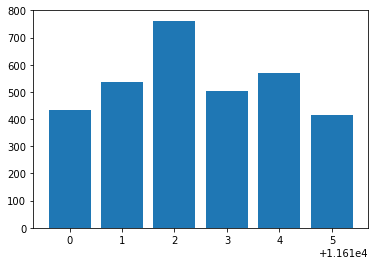

In [65]:
y=[435, 538, 762, 505, 569, 414]
x=[11610, 11611, 11612, 11613, 11614, 11615]
figure= figsize=(8,8)
plt.bar(x,y)

In [105]:
conn.close()